In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load
from wordcloud import WordCloud

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pd.options.display.max_colwidth = 200

# Load test result

In [2]:
df = pd.read_csv('data/model_compare3.csv')

In [3]:
print(df.columns)
display(df.sample(2))

Index(['org_title', 'lower_title', 'cleaned_words', 'cleaned_pos',
       'minimal_words', 'y_true', 'nb_og', 'nb_og_p0', 'nb_og_p1', 'nb_lo',
       'nb_lo_p0', 'nb_lo_p1', 'nb_cw', 'nb_cw_p0', 'nb_cw_p1', 'nb_ps',
       'nb_ps_p0', 'nb_ps_p1', 'nb_mw', 'nb_mw_p0', 'nb_mw_p1', 'fnn_og',
       'fnn_og_p0', 'fnn_og_p1', 'fnn_lo', 'fnn_lo_p0', 'fnn_lo_p1', 'fnn_cw',
       'fnn_cw_p0', 'fnn_cw_p1', 'fnn_ps', 'fnn_ps_p0', 'fnn_ps_p1', 'fnn_mw',
       'fnn_mw_p0', 'fnn_mw_p1', 'lstm_og', 'lstm_og_p0', 'lstm_og_p1',
       'lstm_lo', 'lstm_lo_p0', 'lstm_lo_p1', 'lstm_cw', 'lstm_cw_p0',
       'lstm_cw_p1', 'lstm_ps', 'lstm_ps_p0', 'lstm_ps_p1', 'lstm_mw',
       'lstm_mw_p0', 'lstm_mw_p1', 'too_long', 'noisy', 'clickbait', 'slang',
       'donald', 'obama', 'hillary', 'bernie'],
      dtype='object')


,org_title,lower_title,cleaned_words,cleaned_pos,minimal_words,y_true,nb_og,nb_og_p0,nb_og_p1,nb_lo,...,lstm_mw_p0,lstm_mw_p1,too_long,noisy,clickbait,slang,donald,obama,hillary,bernie
1808,(VIDEO) RIOTERS TAKE SELFIES WITH TORCHED POLICE CAR,(video) rioters take selfies with torched police car,( video ) rioters take selfies with torched police car,( NN ) NNS VB NN NN NN NNS NN,video rioter take selfies torched police car,1,1,0.012168,0.987832,1,...,0.000005,0.999995,0,0,0,0,0,0,0,0
1823,Battle lines drawn for South Africa's ANC on eve of leadership vote,battle lines drawn for south africa's anc on eve of leadership vote,battle lines drawn for south africa 's anc on eve of leadership vote,NNP NNS NN IN NNP NNP POS NNP IN NN IN NN NN,battle line drawn south africa anc eve leadership vote,0,0,0.999969,0.000031,0,...,0.999995,0.000005,0,0,0,0,0,0,0,0


In [4]:
seq_type = ['Original','Lower','CleanedWords','PoS','MinimalWords']
ml_type = ['NaiveBayes','FNN','LSTM']
seq_type_abb = ['og','lo','cw','ps','mw']
ml_type_abb = ['nb','fnn','lstm']
cut_name = ['too_long','noisy','slang','donald', 'obama', 'hillary', 'bernie']
x_name = df.columns[:len(seq_type)]


X = []
for i in range(len(seq_type)):
    X.append(df[x_name[i]].to_numpy())

y_true = df.y_true.to_numpy()

# name of all models
y_name = []
for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        y_name.append(ml_type_abb[i]+'_'+seq_type_abb[j])
        
for i in range(len(cut_name)):
    y_name.append(cut_name[i])

# prediction
y_pred = []
for i in range(len(y_name)):
    y_pred.append(df[y_name[i]].to_numpy())

# probability
fake_prob = []
for i in range(len(ml_type)*len(seq_type)):
    fake_prob.append(df[y_name[i]+'_p1'].to_numpy())

# Score summary

In [5]:
df_entries = []


for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        ac = accuracy_score(y_true, y_pred[k])
        pr = precision_score(y_true, y_pred[k])
        re = recall_score(y_true, y_pred[k])
        f1 = f1_score(y_true, y_pred[k])
        df_entries.append([ml_type[i],seq_type[j],ac,pr,re,f1])
        
df_summary = pd.DataFrame(df_entries, columns = ['model','input','accuracy','precision','recall','f1score'])        
        

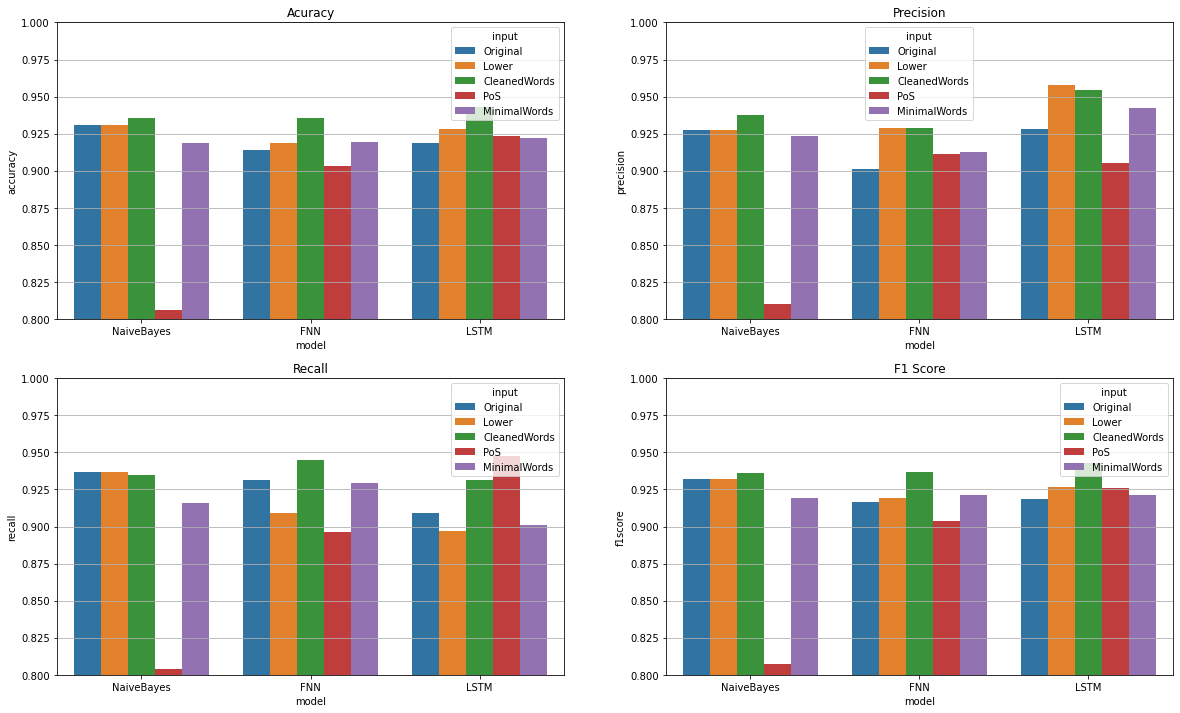

In [11]:
plt.rcParams["figure.figsize"] = (20,12)

fig, ax = plt.subplots(2, 2)

ax[0, 0].set_title('Acuracy')
ax[0, 0].set_ylim(0.8, 1.0)
sns.barplot(x="model", y="accuracy", hue="input", data=df_summary, ax = ax[0, 0])
ax[0, 0].grid(True, axis='y')

ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim(0.8, 1.0)
sns.barplot(x="model", y="precision", hue="input", data=df_summary, ax = ax[0, 1])
ax[0, 1].grid(True, axis='y')

ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim(0.8, 1.0)
sns.barplot(x="model", y="recall", hue="input", data=df_summary, ax = ax[1, 0])
ax[1, 0].grid(True, axis='y')

ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylim(0.8, 1.0)
sns.barplot(x="model", y="f1score", hue="input", data=df_summary, ax = ax[1, 1])
ax[1, 1].grid(True, axis='y')

plt.show()

### Findings
- **LSTM with PoS (part of speech)** tagging input showed the **best performance**.
- Naive bayes showed less dependency on input data, wheras both **FNN and LSTM** showed **much batter performance with PoS tags**. It tells **grammar structure is the strongest feature of classification** in this dataset.
- **Manual text cleaning ("CleanedWords") improved** performance, however, **lemmatization and stopword removal ("MinimalWords") didn't improve** performance.
- Unlike my naive expectation, (Minimal Words) showed worst performance. It tells **including noise of text improves fake news classification**.

# Correlation

In [12]:
corr_vars = []
for i in range(len(df.columns)):
    
    x = df.columns[i]
    if '_p1' in x:
        corr_vars.append(x)
        
df_corr = df[corr_vars]
#display(df_corr)

In [13]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,nb_og_p1,nb_lo_p1,nb_cw_p1,nb_ps_p1,nb_mw_p1,fnn_og_p1,fnn_lo_p1,fnn_cw_p1,fnn_ps_p1,fnn_mw_p1,lstm_og_p1,lstm_lo_p1,lstm_cw_p1,lstm_ps_p1,lstm_mw_p1
nb_og_p1,1.000000,1.000000,0.992907,0.672835,0.955407,0.894007,0.900919,0.908660,0.809112,0.887332,0.887808,0.897926,0.911993,0.822380,0.879244
nb_lo_p1,1.000000,1.000000,0.992907,0.672835,0.955407,0.894007,0.900919,0.908660,0.809112,0.887332,0.887808,0.897926,0.911993,0.822380,0.879244
nb_cw_p1,0.992907,0.992907,1.000000,0.677291,0.963205,0.895913,0.903666,0.907970,0.814087,0.885962,0.891567,0.902325,0.915156,0.824540,0.881489
nb_ps_p1,0.672835,0.672835,0.677291,1.000000,0.645519,0.649331,0.649324,0.681702,0.809840,0.616675,0.650302,0.667094,0.679839,0.766620,0.625799
nb_mw_p1,0.955407,0.955407,0.963205,0.645519,1.000000,0.876028,0.880977,0.884791,0.792772,0.905406,0.865529,0.877923,0.890980,0.804811,0.887098
fnn_og_p1,0.894007,0.894007,0.895913,0.649331,0.876028,1.000000,0.968294,0.886421,0.780218,0.868232,0.932995,0.925775,0.884182,0.799015,0.839612
fnn_lo_p1,0.900919,0.900919,0.903666,0.649324,0.880977,0.968294,1.000000,0.893483,0.787573,0.871157,0.936726,0.945473,0.890749,0.803987,0.848103
fnn_cw_p1,0.908660,0.908660,0.907970,0.681702,0.884791,0.886421,0.893483,1.000000,0.832886,0.883765,0.882062,0.887443,0.938682,0.837066,0.863816
fnn_ps_p1,0.809112,0.809112,0.814087,0.809840,0.792772,0.780218,0.787573,0.832886,1.000000,0.779537,0.789294,0.803719,0.837771,0.939198,0.781453
fnn_mw_p1,0.887332,0.887332,0.885962,0.616675,0.905406,0.868232,0.871157,0.883765,0.779537,1.000000,0.854379,0.860819,0.881224,0.793425,0.910153


# Global interpretation - Naive Bayes

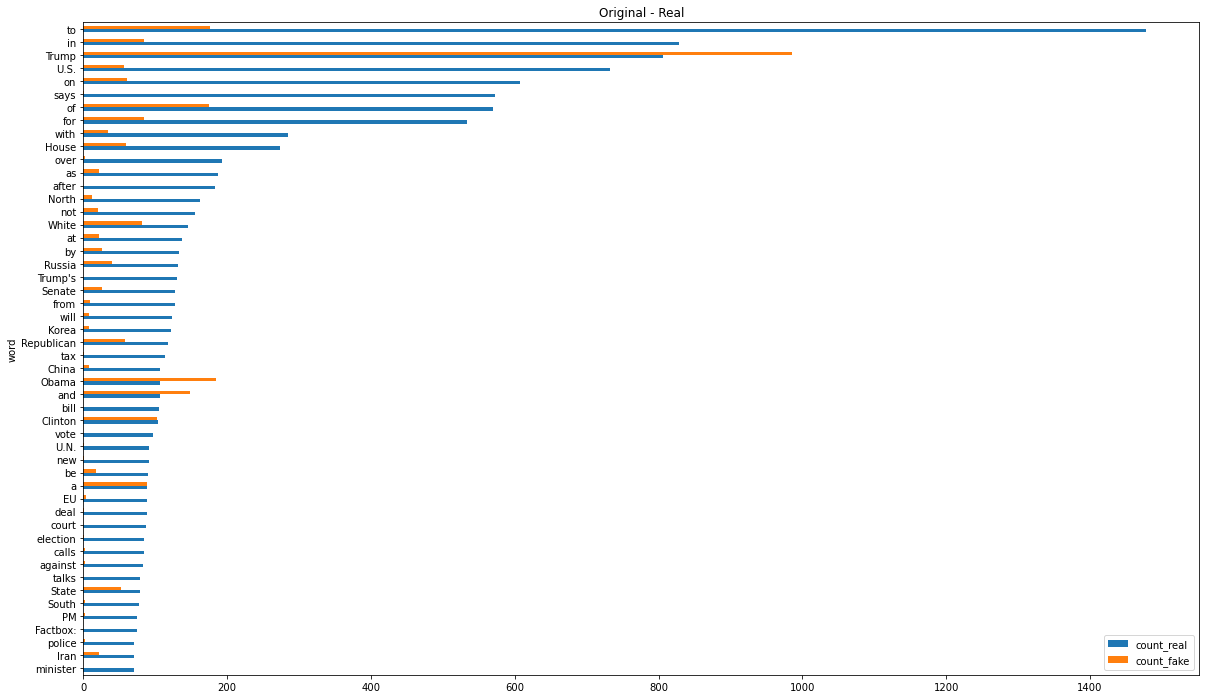

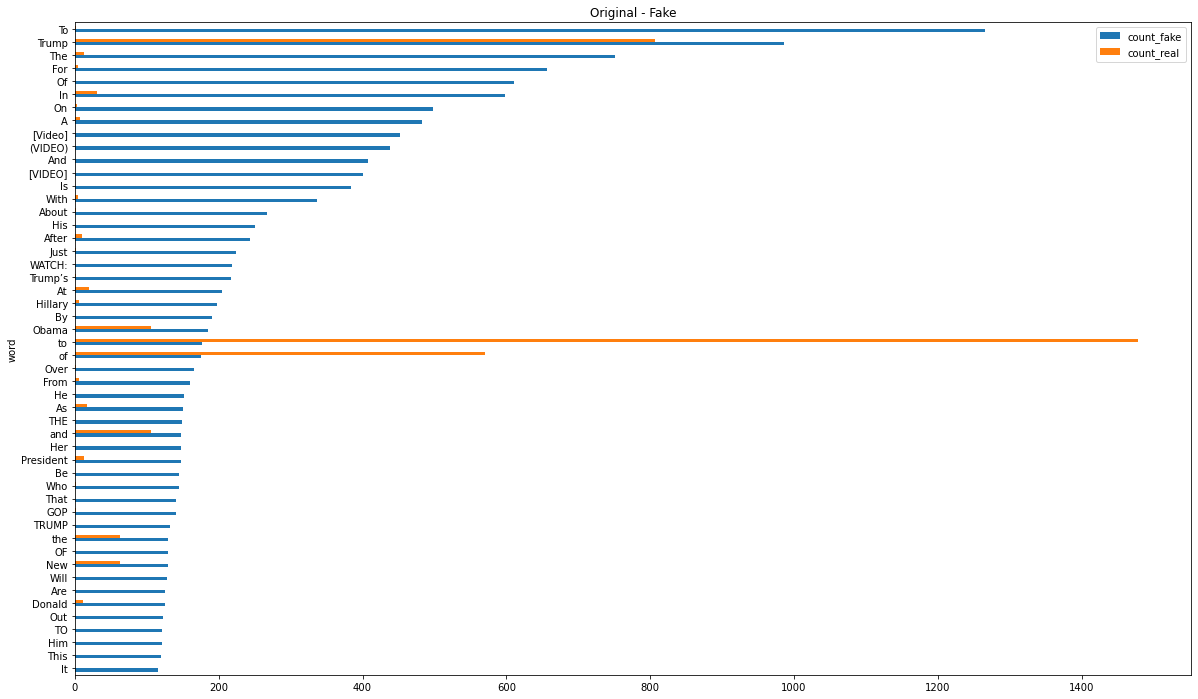

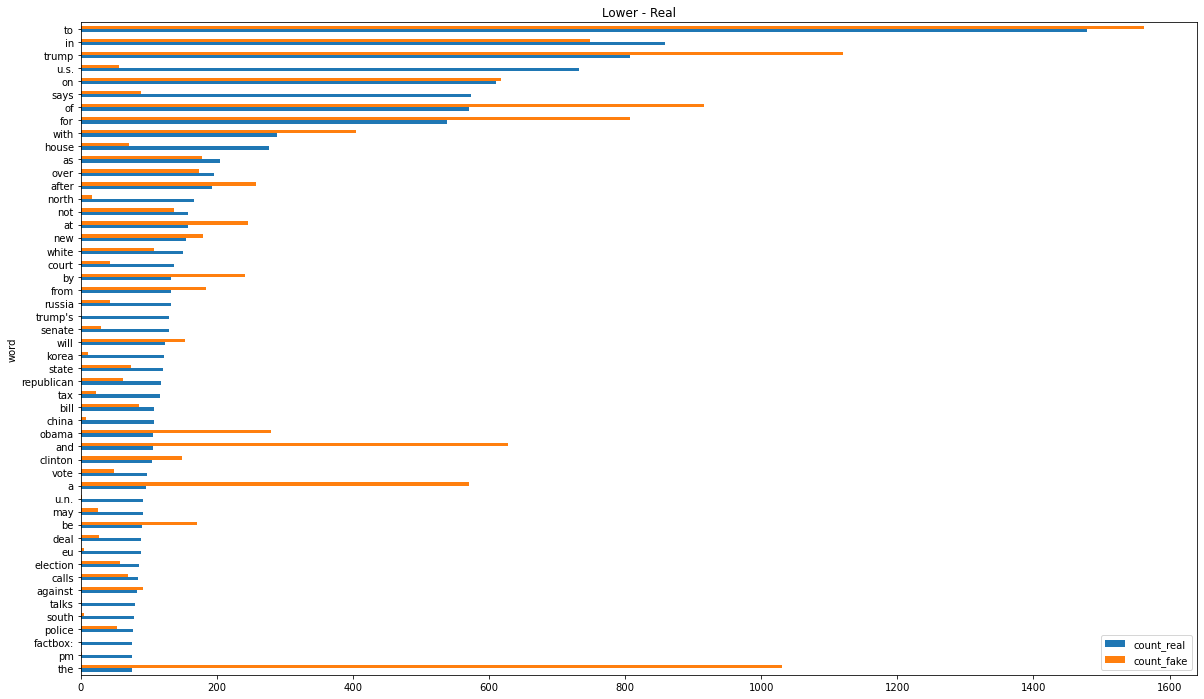

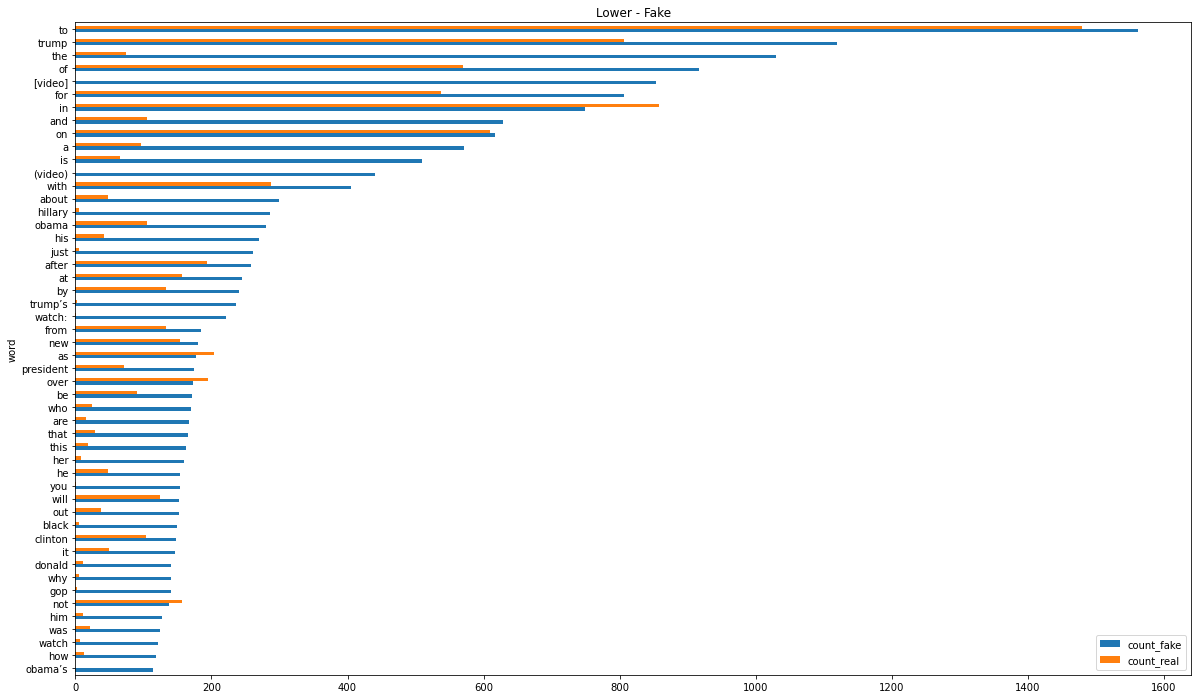

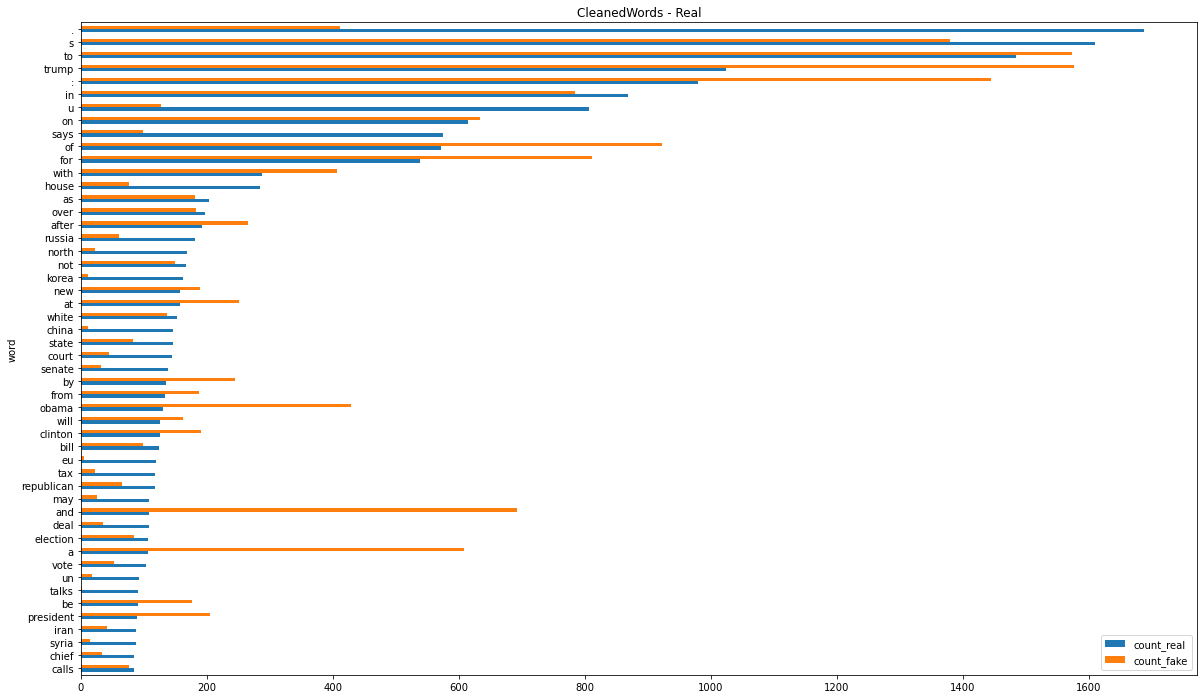

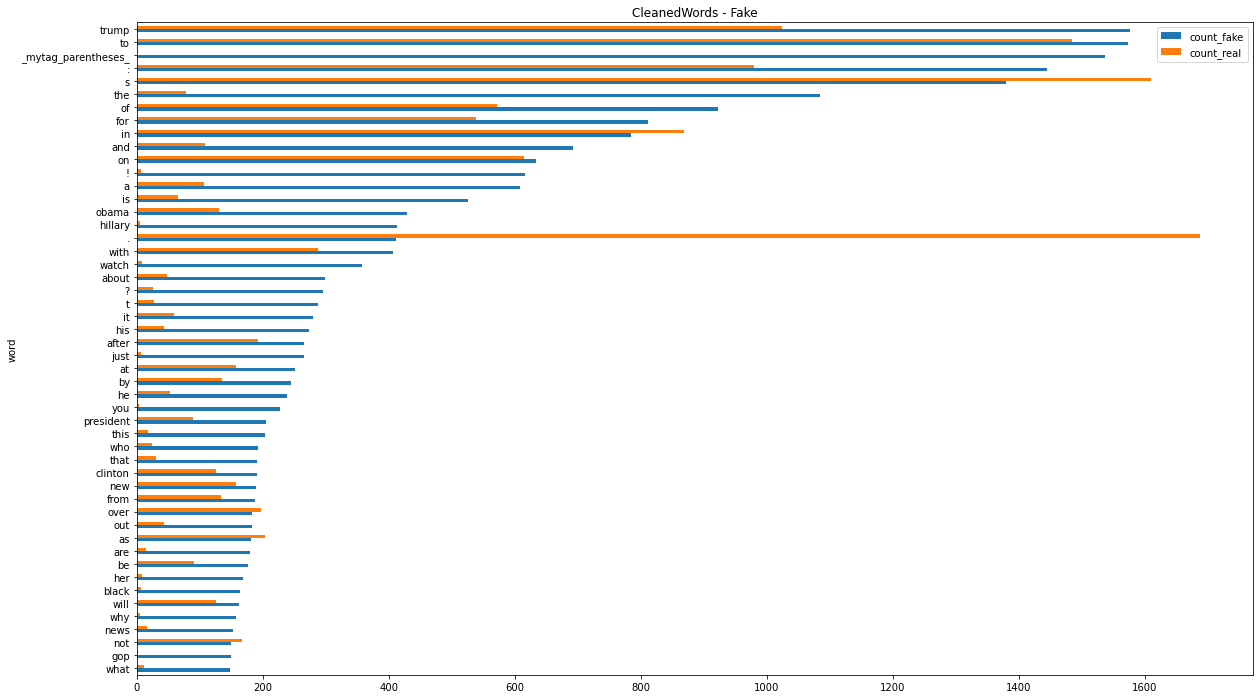

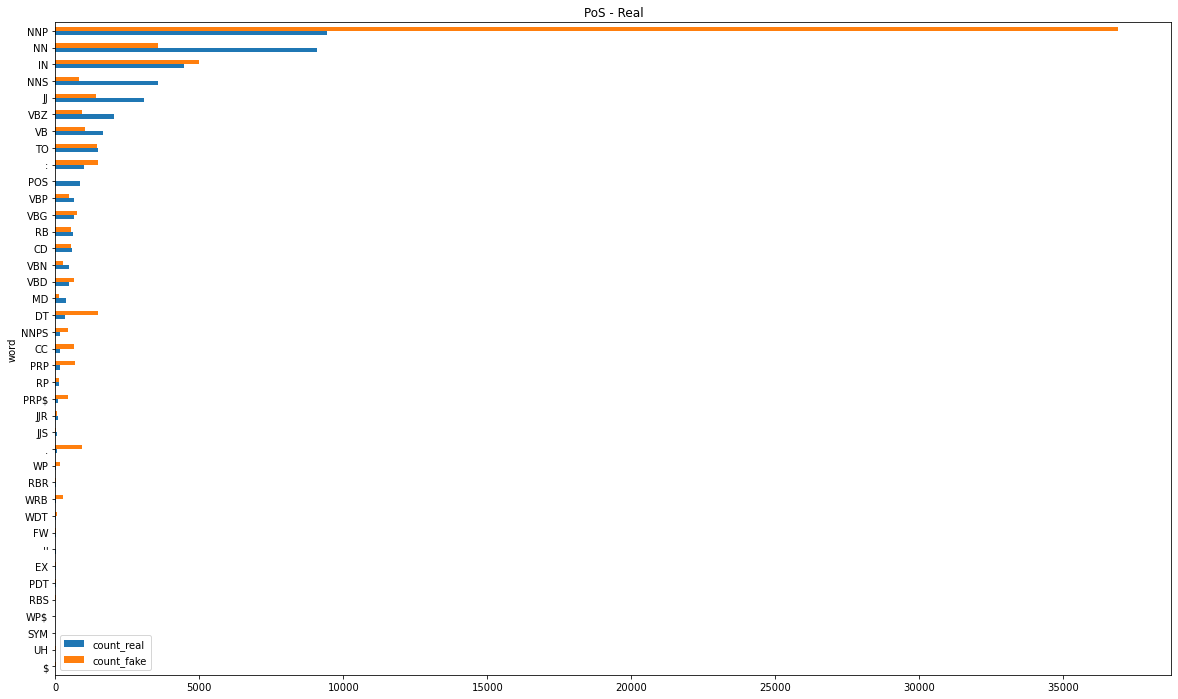

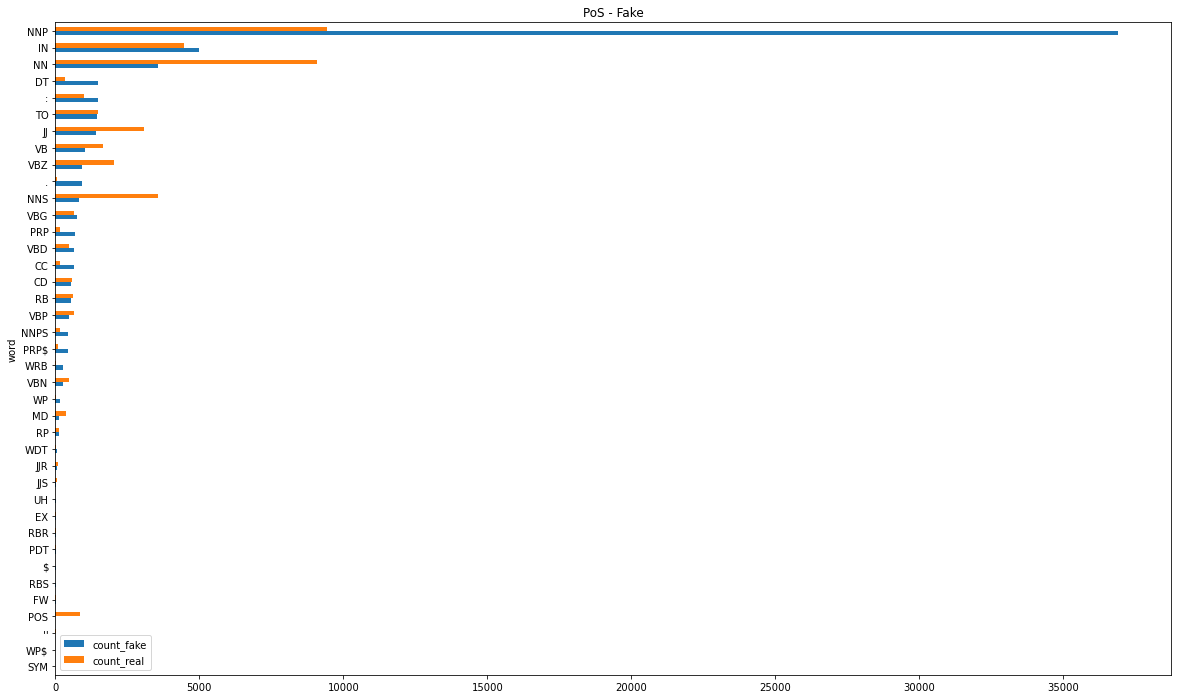

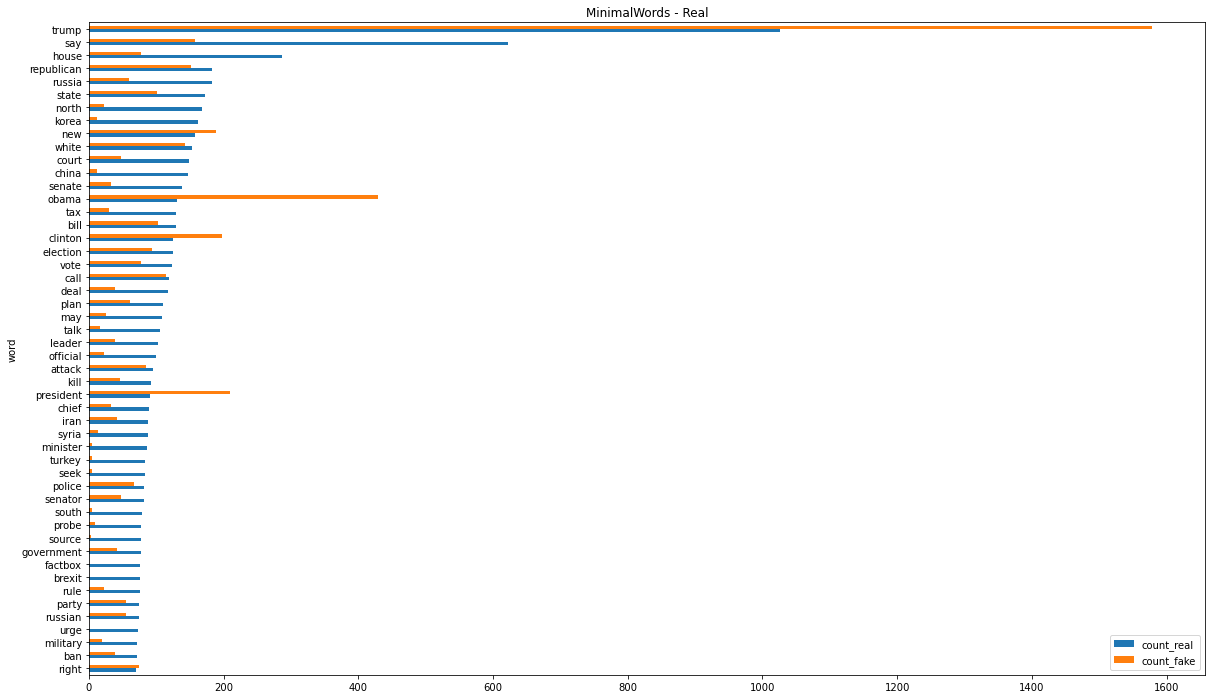

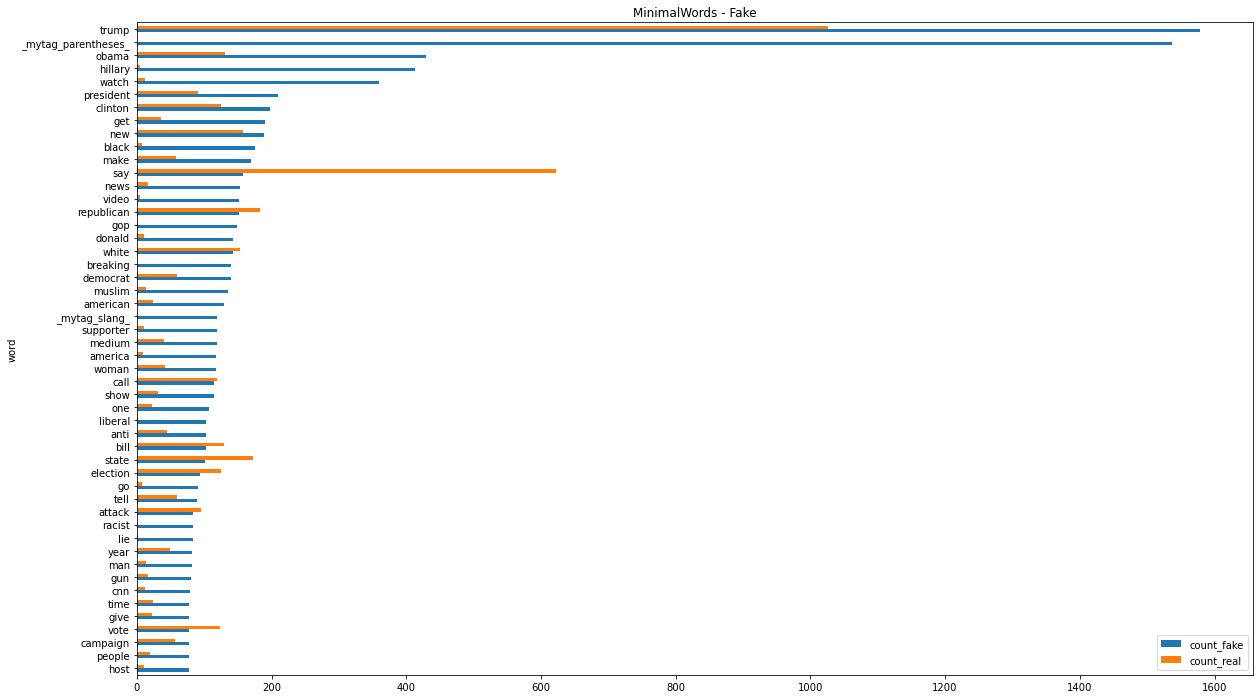

In [108]:
#save_name = 'data/nb'+str(i)
#dump(classifier,save_name)
#save_name = 'data/nb_counter'+str(i)
#dump(counter,save_name)

#fig, ax = plt.subplots(5, 2)

for i in range(len(seq_type)):
    save_name = 'data/nb'+str(i)
    classifier = load(save_name)
    save_name = 'data/nb_counter_real'+str(i)
    counter_real = load(save_name)
    save_name = 'data/nb_counter_fake'+str(i)
    counter_fake = load(save_name)
    
    df_real = pd.DataFrame( counter_real.most_common(), columns = ['word','count_real'])
    df_fake = pd.DataFrame( counter_fake.most_common(), columns = ['word','count_fake'])
    
    df_both = pd.merge(df_real, df_fake, on='word', how='outer')
    df_both.set_index('word')

    df_real_top = df_both.sort_values(by=['count_real'], ascending=False).iloc[:50].iloc[::-1]
    df_fake_top = df_both.sort_values(by=['count_fake'], ascending=False).iloc[:50].iloc[::-1]
    
    df_real_top.plot.barh(x='word', y=['count_real','count_fake'])
    plt.title(seq_type[i]+' '+'- Real')

    df_fake_top.plot.barh(x='word', y=['count_fake','count_real'])
    plt.title(seq_type[i]+' '+'- Fake')


plt.show()    

# SHAP

In [ ]:
        
        save_name = 'data/nn'+str(i)
        model.save(save_name)
        save_name = 'data/nn_history'+str(i)
        dump(history,save_name)

# Right/Wrong classification examples

In [7]:
df_r = []
df_w = []

for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        #y_name = ml_type_abb[i]+'_'+seq_type_abb[j]
        
        r = df[df.y_true==df[y_name[k]]][['org_title','y_true',y_name[k]+'_p1']]
        w = df[df.y_true!=df[y_name[k]]][['org_title','y_true',y_name[k]+'_p1']]
        
        r['gap'] = abs(r[y_name[k]+'_p1']-r.y_true)
        w['gap'] = abs(w[y_name[k]+'_p1']-w.y_true)
        
        r.sort_values(by=['gap'],axis=0,inplace=True)
        w.sort_values(by=['gap'],axis=0,inplace=True)
        
        df_r.append(r)
        df_w.append(w)        

for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        title = ml_type[i],seq_type[j]
        
        print(title,' Right, confident')
        display(df_r[k].iloc[:10])
        
        print(title,' Right, subtle')
        display(df_r[k].iloc[-10:])
        
        print(title,' Wrong, subtle')
        display(df_w[k].iloc[:10])        
        
        
        print(title,' Wrong, confident')
        display(df_w[k].iloc[-10:])

### Findings
- Overall high correlation
- Models with PoS tags input have slightly lower correlation with the other models except another model with PoS tags input.